## 第5章 分类和标注词汇

我们将介绍NLP的一些基本技术，包括序列标注、N-gram模型、回退和评估。 这些技术在许多方面都很有用，标注为我们提供了一个表示它们的简单的上下文。我们还将看到标注为何是典型的NLP流水线中继分词之后的第二个步骤。

将词汇按它们的词性（`parts-of-speech`，`POS`）分类以及相应的标注它们的过程被称为词性标注（`part-of-speech tagging`, `POS tagging`）或干脆简称标注。词性也称为词类或词汇范畴。用于特定任务的标记的集合被称为一个标记集。我们在本章的重点是利用标记和自动标注文本。 


### 5.1 使用词性标注器

一个词性标注器（`part-of-speech tagger` 或`POS tagger`）处理一个词序列，为每个词附加一个词性标记（不要忘记 `import nltk`）：

In [1]:
import nltk
text = nltk.word_tokenize("And now for someting completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('someting', 'VBG'),
 ('completely', 'RB'),
 ('different', 'JJ')]

在这里我们看到`and` 是 `CC`，并列连词；`now` 和`completely` 是 `RB`，副词；`for` 是 `IN`，介词；`something` 是`NN`，名词；`different` 是 `JJ`，形容词。

> NLTK中提供了每个标记的文档，可以使用标记来查询，如：`nltk.help.upenn_tagset('RB')`，或正则表达式，如：`nltk.help.upenn_brown_tagset('N N.*')`。一些语料库有标记集文档的README文件；见 `nltk.name.readme()`，用语料库的名称替换 `name`。

让我们来看看另一个例子，这次包括一些同形同音异义词：

In [5]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

请注意 `refuse` 和 `permit` 都以一般现在时动词（`VBP`）和名词（`NN`）形式出现。例如：`refUSE` 是一个动词，意为“拒绝”，而`REFuse` 是一个名词，意思是“垃圾”（即它们不是同音词）。因此，我们需要知道正在使用哪一个词以便能正确读课文。（出于这个原因，文本转语音系统通常要进行词性标注。

词汇类别，如“名词”，和词性标记，如`NN`，看上去似乎有其用途，但在细节上将使许多读者感到晦涩。你可能想知道为什么要引进这种额外的信息。这些类别中很多都源于对文本中词的分布的浅层的分析。考虑下面的分析，涉及`woman`（名词），`bought`（动词），`over`（介词）和 `the`（限定词）。`text.similar()`方法为一个词`w` 找出所有上下文`w1ww2`，然后找出所有出现在相同上下文中的词 `w'`，即`w1w'w2`。

In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [7]:
 text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [8]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [9]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


### 标注语料库

#### 表示已标注的标识符

按照NLTK的约定，一个已标注的标识符使用一个由标识符和标记组成的元组来表示。我们可以使用函数`str2tuple()` 从表示一个已标注的标识符的标准字符串创建一个这样的特殊元组：

In [10]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [11]:
tagged_token[0]

'fly'

In [12]:
tagged_token[1]

'NN'

我们可以直接从一个字符串构造一个已标注的标识符的链表。第一步是对字符串分词以便能访问单独的词/标记字符串，然后将每一个转换成一个元组（使用`str2tuple()`）:

In [13]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN 
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC 
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PP 
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/R 
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT 
interest/NN of/IN both/ABX governments/NNS ''/'' ./.  
'''
[nltk.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PP'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'R'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

#### 读取已标注的语料库

NLTK 中包括的若干语料库已标注了词性。
其他语料库使用各种格式存储词性标记。NLTK 中的语料库阅读器提供了一个统一的接口，使你不必理会这些不同的文件格式。与刚才提取并显示的上面的文件不同，布朗语料库的语料库阅读器按如下所示的方式表示数据。注意：部分词性标记已转换为大写的；自从布朗语料库发布以来，这已成为标准的做法。

In [14]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

只要语料库包含已标注的文本，NLTK 的语料库接口都将有一个 `tagged_words()`方法。下面是一些例子，再次使用布朗语料库所示的输出格式：

In [16]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [17]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

NLTK 中还有其他几种语言的已标注语料库，包括中文，印地语，葡萄牙语，西班牙语， 荷兰语和加泰罗尼亚语。这些通常含有非ASCII文本，当输出较大的结构如列表时，Python总是以十六进制显示这些。

In [19]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [20]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [21]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [22]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [24]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

In [25]:
# 如果语料库也被分割成句子，将有一个 tagged_sents()方法将已标注的词划分成句
# 子，而不是将它们表示成一个大链表。
nltk.corpus.cess_cat.tagged_sents()

[[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ('-Fpa-', 'Fpa'), ('TS', 'np0000o'), ('-Fpt-', 'Fpt'), ('ha', 'vaip3s0'), ('confirmat', 'vmp00sm'), ('la', 'da0fs0'), ('condemna', 'ncfs000'), ('a', 'sps00'), ('quatre', 'dn0cp0'), ('anys', 'ncmp000'), ("d'", 'sps00'), ('inhabilitació', 'ncfs000'), ('especial', 'aq0cs0'), ('i', 'cc'), ('una', 'di0fs0'), ('multa', 'ncfs000'), ('de', 'sps00'), ('3,6', 'Z'), ('milions', 'ncmp000'), ('de', 'sps00'), ('pessetes', 'Zm'), ('per', 'sps00'), ('a', 'sps00'), ('quatre', 'dn0cp0'), ('veterinaris', 'ncmp000'), ('gironins', 'aq0mp0'), (',', 'Fc'), ('per', 'sps00'), ('haver', 'van0000'), ('-se', 'p0300000'), ('beneficiat', 'vmp00sm'), ('dels', 'spcmp'), ('càrrecs', 'ncmp000'), ('públics', 'aq0mp0'), ('que', 'pr0cn000'), ('*0*', 'sn.e-SUJ'), ('desenvolupaven', 'vmii3p0'), ('i', 'cc'), ('la_seva', 'dp3fs0'), ('relació', 'ncfs000'), ('amb', 'sps00'), ('les', 'da0fp0'), ('empreses', 'ncfp000'), ('càrniques', 'aq0fp0'), ('de', 'sps00'), ('la', 'da0fs0'),

#### 简化的词性标记集

![list5-1-1](./imgs/list5-1.jpg)
![list5-1-2](./imgs/list5-1-2.jpg)

让我们来看看这些标记中哪些是布朗语料库的新闻类中最常见的：

In [27]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

dict_keys(['AT', 'NP-TL', 'NN-TL', 'JJ-TL', 'VBD', 'NR', 'NN', 'IN', 'NP$', 'JJ', '``', "''", 'CS', 'DTI', 'NNS', '.', 'RBR', ',', 'WDT', 'HVD', 'VBZ', 'CC', 'IN-TL', 'BEDZ', 'VBN', 'NP', 'BEN', 'TO', 'VB', 'RB', 'DT', 'PPS', 'DOD', 'AP', 'BER', 'HV', 'DTS', 'VBG', 'PPO', 'QL', 'JJT', 'ABX', 'NN-HL', 'VBN-HL', 'WRB', 'CD', 'MD', 'BE', 'JJR', 'VBG-TL', 'BEZ', 'NN$-TL', 'HVZ', 'ABN', 'PN', 'PPSS', 'PP$', 'DO', 'NN$', 'NNS-HL', 'WPS', '*', 'EX', 'VB-HL', ':', '(', ')', 'NNS-TL', 'NPS', 'JJS', 'RP', '--', 'BED', 'OD', 'BEG', 'AT-HL', 'VBG-HL', 'AT-TL', 'PPL', 'DOZ', 'NP-HL', 'NR$', 'DOD*', 'BEDZ*', ',-HL', 'CC-TL', 'MD*', 'NNS$', 'PPSS+BER', "'", 'PPSS+BEM', 'CD-TL', 'RBT', '(-HL', ')-HL', 'MD-HL', 'VBZ-HL', 'IN-HL', 'JJ-HL', 'PPLS', 'CD-HL', 'WPO', 'JJS-TL', 'ABL', 'BER-HL', 'PPS+HVZ', 'VBD-HL', 'RP-HL', 'MD*-HL', 'AP-HL', 'CS-HL', 'DT$', 'HVN', 'FW-IN', 'FW-DT', 'VBN-TL', 'NR-TL', 'NNS$-TL', 'FW-NN', 'HVG', 'DTX', 'OD-TL', 'BEM', 'RB-HL', 'PPSS+MD', 'NPS-HL', 'NPS$', 'WP$', 'NN-TL-HL', '

In [30]:
nltk.app.concordance()

#### 名词

名词一般指的是人、地点、事情或概念，例如：女人、苏格兰、图书、情报。名词可能出现在限定词和形容词之后，可以是动词的主语或宾语，如表 5-2 所示。

![list5-2](./imgs/list5-2.jpg)

简化的名词标记对普通名词是`N`，如：书，对专有名词是`NP`，如苏格兰。 让我们检查一些已标注的文本，看看哪些词类出现在一个名词前，频率最高的在最前面。
首先，我们构建一个双连词链表，它的成员是它们自己的词-标记对，例如：`(('The', 'DET ')`，`('Fulton', 'NP'))`和`(('Fulton', 'NP')`，`('County', 'N'))`。然后，我们构建了一个双连
词的标记部分的`FreqDist`。

In [38]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
list(nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1] == 'N'))
# print(brown_news_tagged)

[]

#### 动词

动词是用来描述事件和行动的词，例如：`fall` 和 `eat`，如表 5-3 所示。在一个句子中，动词通常表示涉及一个或多个名词短语所指示物的关系。

![list5-3](./imgs/list5-3.jpg)

新闻文本中最常见的动词是什么？让我们按频率排序所有动词：

In [39]:
wsj = nltk.corpus.treebank.tagged_words()
word_tag_fd = nltk.FreqDist(wsj)
[word + "/" + tag for (word, tag) in word_tag_fd if tag.startswith('V')]

['join/VB',
 'is/VBZ',
 'publishing/VBG',
 'was/VBD',
 'named/VBN',
 'used/VBN',
 'make/VB',
 'has/VBZ',
 'caused/VBN',
 'exposed/VBN',
 'reported/VBD',
 'enters/VBZ',
 'causing/VBG',
 'show/VBP',
 'said/VBD',
 'makes/VBZ',
 'stopped/VBD',
 'using/VBG',
 'were/VBD',
 'reported/VBN',
 'appear/VBP',
 'bring/VB',
 "'re/VBP",
 'talking/VBG',
 'heard/VBD',
 'having/VBG',
 'studied/VBD',
 'have/VBP',
 'are/VBP',
 'led/VBD',
 'making/VBG',
 'replaced/VBN',
 'sold/VBN',
 'worked/VBD',
 'died/VBN',
 'expected/VBN',
 'surviving/VBG',
 'including/VBG',
 'diagnosed/VBN',
 'study/VBP',
 'appears/VBZ',
 'be/VB',
 'studied/VBN',
 'industrialized/VBN',
 'owned/VBN',
 'support/VB',
 'argue/VBP',
 'regulate/VB',
 'found/VBN',
 'does/VBZ',
 'have/VB',
 'classified/VBN',
 'according/VBG',
 'rejected/VBN',
 'explained/VBD',
 'imposed/VBD',
 'remaining/VBG',
 'outlawed/VBN',
 'made/VBD',
 'dumped/VBD',
 'imported/VBN',
 'poured/VBD',
 'mixed/VBD',
 'described/VBD',
 'hung/VBD',
 'ventilated/VBD',
 "'s/VBZ",

请注意，频率分布中计算的项目是词-标记对。由于词汇和标记是成对的，我们可以把词作作为条件，标记作为事件，使用条件-事件对的链表初始化一个条件频率分布。这让我们看到了一个给定的词的标记的频率顺序列表。

In [40]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].keys()

dict_keys(['NN', 'VB'])

In [41]:
cfd1['cut'].keys()

dict_keys(['VBD', 'VB', 'VBN', 'NN'])

我们可以颠倒配对的顺序，这样标记作为条件，词汇作为事件。现在我们可以看到对于一个给定的标记可能的词。

In [43]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
cfd2['VBN'].keys()

dict_keys(['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'i

要弄清`VD`（过去式）和`VN`（过去分词）之间的区别，让我们找到可以同是 `VD`和`VN`的词汇，看看一些它们周围的文字：

In [45]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

['named',
 'used',
 'caused',
 'reported',
 'said',
 'stopped',
 'heard',
 'studied',
 'led',
 'replaced',
 'sold',
 'worked',
 'died',
 'found',
 'rejected',
 'imposed',
 'made',
 'dumped',
 'imported',
 'mixed',
 'described',
 'continued',
 'ended',
 'thought',
 'reached',
 'had',
 'approved',
 'completed',
 'suspended',
 'lifted',
 'dropped',
 'voted',
 'settled',
 'decided',
 'followed',
 'welcomed',
 'held',
 'banned',
 'pointed',
 'squeezed',
 'fed',
 'registered',
 'released',
 'increased',
 'forecast',
 'recorded',
 'announced',
 'offered',
 'lowered',
 'spent',
 'proposed',
 'got',
 'added',
 'noted',
 'turned',
 'closed',
 'retired',
 'ordered',
 'required',
 'received',
 'moved',
 'determined',
 'changed',
 'upheld',
 'set',
 'estimated',
 'compared',
 'opened',
 'tied',
 'filed',
 'disclosed',
 'anticipated',
 'attached',
 'called',
 'applied',
 'favored',
 'posted',
 'paid',
 'removed',
 'accelerated',
 'placed',
 'vowed',
 'deemed',
 'prompted',
 'complained',
 'believed'

In [51]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1 -4:idx1 + 1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [53]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4: idx2 + 1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

In [54]:
cfd2['VBN'].keys()

dict_keys(['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'i

#### 形容词和副词

另外两个重要的词类是形容词和副词。形容词修饰名词，可以作为修饰符（如：the large pizza 中的 large）或谓语（如：the pizza is large）。英语形容词可以有内部结构（如：the falling stocks中的 fall+ing）。副词修饰动词，指定时间、方式、地点或动词描述的事件的方向（如：the stocks fell quickly 中的 quickly）。副词也可以修饰的形容词（如：Mary’ s teacher was really nice 中的 really）。

英语中还有几个封闭的词类，如介词，冠词（也常称为限定词）（如：the，a），情态动词（如：should，may），人称代词（如：she，they）。每个词典和语法对这些词的分类都不同。


#### 未简化的标记

让我们找出每个名词类型中最频繁的名词。例5-1中的程序找出所有以`NN`开始的标记， 并为每个标记提供了几个示例词汇。你会看到有许多名词的变种；最重要的含有`$`的名词所有格,含有 `S`的复数名词（因为复数名词通常以`s`结尾），以及含有 `P` 的专有名词。此外，大 多数的标记都有后缀修饰符：`-NC`表示引用，`-HL`表示标题中的词，`-TL`表示标题（布朗标记的特征）。

In [59]:
# 例5-1. 找出最频繁的名词标记的程序
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
        if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].keys()) for tag in cfd.conditions())
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])


NN dict_keys(['investigation', 'primary', 'election', 'evidence', 'place', 'jury', 'term-end', 'charge', 'praise', 'manner', 'term', 'handful', 'interest', 'number', 'size', 'city', 'registration', 'end', 'efficiency', 'cost', 'administration', 'result', 'problem', 'Implementation', 'automobile', 'title', 'law', 'date', 'implementation', 'swipe', 'handling', 'child', 'welfare', 'assistance', 'program', 'state', 'exception', 'money', 'distribution', 'future', 'portion', 'Failure', 'burden', 'court', 'fire', 'appointment', 'awarding', 'compensation', 'interim', 'committee', 'fact', 'effect', 'airport', 'management', 'surveillance', 'purpose', 'doctor', 'intern', 'extern', 'night', 'weekend', 'duty', 'jail', 'legislation', 'establishment', 'pension', 'plan', 'operation', 'prison', 'suit', 'divorce', 'wife', 'petition', 'cruelty', 'couple', 'son', 'daughter', 'mayor', 'property', 'settlement', 'occupation', 'attorney', 'age', 'birth', 'man', 'year', 'Aj', 'interlude', 'career', 'council', 

#### 探索已标注的语料库

假设我们正在研究词`often`，想看看它是如何在文本中使用的。我们可以试着看看跟在
`often`后面的词汇：

In [63]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for(a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

然而，它使用 `tagged_words()`方法查看跟随词的词性标记可能更有指导性。

In [65]:
brown_lrnd_tagged = brown.tagged_words(categories='learned')

In [67]:
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VBN  VB VBD  JJ  IN  QL   ,  CS  RB  AP VBG  RP VBZ QLP BEN WRB   .  TO  HV 
 15  10   8   5   4   3   3   3   3   1   1   1   1   1   1   1   1   1   1 


请注意`often` 后面最高频率的词性是动词。名词从来没有在这个位置出现（在这个特别的语料中）。 接下来，让我们看一些较大范围的上下文，找出涉及特定标记和词序列的词（在这种情况下，“`<Verb>`到`<Verb>`”）。在例5-2中，我们考虑句子中的每个三词窗口，检查它们是否符合我们的标准。如果标记匹配，我们输出对应的词。

In [69]:
# 例5-2. 使用POS标记寻找三词短语。
from nltk.corpus import brown
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

最后，让我们看看与它们的标记关系高度模糊不清的词。了解为什么要标注这样的词是因为它们各自的上下文可以帮助我们弄清楚标记之间的区别。

In [70]:
brown_news_tagged = brown.tagged_words(categories='news')
data = nltk.ConditionalFreqDist((word.lower(), tag)
    for (word, tag) in brown_news_tagged)

for word in data.conditions():
    if len(data[word]) > 3:
        tags = data[word].keys()
        print(word, ' '.join(tags))

no AT RB AT-HL AT-TL
that CS WPS DT QL WPO
place NN VB NN-TL NP
in IN RP IN-HL IN-TL
for IN IN-TL IN-HL CS RB
by IN IN-HL IN-TL RB
to TO IN IN-HL TO-HL IN-TL TO-TL NPS
only RB AP JJ QL
a AT AT-HL NN AT-TL FW-IN
act VB NN NN-TL NN-HL
end NN VB NN-TL NN-HL
on IN IN-TL RP IN-HL
best JJT RBT JJT-HL VB NP-TL
cost NN NN-HL VB VBD
as CS IN QL CS-HL
major JJ NN-TL NP NN
general JJ NN JJ-TL NN-TL
fair JJ NN JJ-HL NN-TL JJ-TL
plan NN VB NN-HL NN-TL
police NNS-TL NN NNS NNS-HL
more AP AP-HL QL RBR
home NR NN NN-HL NN-TL NR-HL NP
back RB VB NN RB-HL RB-TL
present JJ RB NN VB
held VBN VBD VBN-HL VBD-HL
force VB NN-TL NN FW-NN-TL
out RP IN PP$ RP-HL
first OD RB OD-HL RB-HL OD-TL
must MD MD-HL MD-TL NN
issue NN VB VB-HL NN-HL
near RB RB-HL JJ IN QL
most QL AP RBT QL-TL
house NN-TL NN NN-HL NP-TL-HL NP NN-TL-HL VB
increase NN VB VB-HL NN-HL
set VB VBN VBD VBN-HL NN
last AP AP-TL VB NN AP-HL
past NN JJ AP IN
like VB CS IN JJ VB-HL
read VBN VBD NP VB
march NP NN NP-HL NN-TL VB
post NN VB NP NN-TL
good J

In [71]:
nltk.app.concordance()

### 5.3 使用 Python 字典映射词及其属性

正如我们已经看到， `(word, tag)`形式的一个已标注词是词和词性标记的关联。一旦我们开始做词性标注，我们将会创建分配一个标记给一个词的程序，标记是在给定上下文中 最可能的标记。我们可以认为这个过程是从词到标记的映射。在 Python中最自然的方式存储映射是使用所谓的字典数据类型（在其他的编程语言又称为关联数组或哈希数组）。在本节中，我们来看看字典，看它如何能表示包括词性在内的各种不同的语言信息。

#### 索引链表 VS 字典
#### Python 字典

In [76]:
pos = {}
pos['colorless'] = 'ADJ'
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [77]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [78]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [79]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [80]:
pos.keys()

dict_keys(['colorless', 'ideas', 'sleep', 'furiously'])

In [82]:
pos.values()

dict_values(['ADJ', 'N', 'V', 'ADV'])

In [83]:
for key, val in sorted(pos.items()):
    print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


我们要确保当我们在字典中查找某词时，一个键只得到一个值。然而，有一个方法可以在该项目中存储多个值：我们使 用一个链表值:

In [85]:
pos['sleep'] = ['N', 'V']
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': ['N', 'V'], 'furiously': 'ADV'}

#### 定义字典

字典的键必须是不可改变的类型，如字符串和元组。

In [86]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [87]:
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

#### 默认字典

In [88]:
frequency = nltk.defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']

0

In [89]:
pos = nltk.defaultdict(list)
pos['sleep'] = ['N', 'V']
pos['ideas']

[]

In [90]:
# 创建一个任一条目的默认值是'N'的字典
pos = nltk.defaultdict(lambda: 'N')
pos['colorless'] = 'ADJ'
pos['blog']

'N'

In [91]:
pos.items()

dict_items([('colorless', 'ADJ'), ('blog', 'N')])

In [92]:
f = lambda: 'N'
f()

'N'

In [93]:
def g():
    return 'N'
g()

'N'

让我们来看看默认字典如何被应用在较大规模的语言处理任务中。许多语言处理任务——包括标注——费很大力气来正确处理文本中只出现过一次的词。如果有一个固定的词汇和没有新词会出现的保证，它们会有更好的表现。我们可以预处理一个文本，在一个默认字典的帮助下，替换低频词汇为一个特殊的“超出词汇表”标识符，`UNK`（out of vocabulary）。 （你能不看下面的想出如何做吗？） 我们需要创建一个默认字典，映射每个词为它们的替换词。最频繁的n 个词将被映射到它们自己。其他的被映射到`UNK`。

In [100]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = list(vocab)[:1000]
mapping = nltk.defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [104]:
# 例5-3. 递增地更新字典，按值排序。
counts = nltk.defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news'):
    counts[tag] += 1

counts['NN']

13162

In [105]:
list(counts)

['AT',
 'NP-TL',
 'NN-TL',
 'JJ-TL',
 'VBD',
 'NR',
 'NN',
 'IN',
 'NP$',
 'JJ',
 '``',
 "''",
 'CS',
 'DTI',
 'NNS',
 '.',
 'RBR',
 ',',
 'WDT',
 'HVD',
 'VBZ',
 'CC',
 'IN-TL',
 'BEDZ',
 'VBN',
 'NP',
 'BEN',
 'TO',
 'VB',
 'RB',
 'DT',
 'PPS',
 'DOD',
 'AP',
 'BER',
 'HV',
 'DTS',
 'VBG',
 'PPO',
 'QL',
 'JJT',
 'ABX',
 'NN-HL',
 'VBN-HL',
 'WRB',
 'CD',
 'MD',
 'BE',
 'JJR',
 'VBG-TL',
 'BEZ',
 'NN$-TL',
 'HVZ',
 'ABN',
 'PN',
 'PPSS',
 'PP$',
 'DO',
 'NN$',
 'NNS-HL',
 'WPS',
 '*',
 'EX',
 'VB-HL',
 ':',
 '(',
 ')',
 'NNS-TL',
 'NPS',
 'JJS',
 'RP',
 '--',
 'BED',
 'OD',
 'BEG',
 'AT-HL',
 'VBG-HL',
 'AT-TL',
 'PPL',
 'DOZ',
 'NP-HL',
 'NR$',
 'DOD*',
 'BEDZ*',
 ',-HL',
 'CC-TL',
 'MD*',
 'NNS$',
 'PPSS+BER',
 "'",
 'PPSS+BEM',
 'CD-TL',
 'RBT',
 '(-HL',
 ')-HL',
 'MD-HL',
 'VBZ-HL',
 'IN-HL',
 'JJ-HL',
 'PPLS',
 'CD-HL',
 'WPO',
 'JJS-TL',
 'ABL',
 'BER-HL',
 'PPS+HVZ',
 'VBD-HL',
 'RP-HL',
 'MD*-HL',
 'AP-HL',
 'CS-HL',
 'DT$',
 'HVN',
 'FW-IN',
 'FW-DT',
 'VBN-TL',
 'NR-TL',
 '

In [106]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NN', 13162),
 ('IN', 10616),
 ('AT', 8893),
 ('NP', 6866),
 (',', 5133),
 ('NNS', 5066),
 ('.', 4452),
 ('JJ', 4392),
 ('CC', 2664),
 ('VBD', 2524),
 ('NN-TL', 2486),
 ('VB', 2440),
 ('VBN', 2269),
 ('RB', 2166),
 ('CD', 2020),
 ('CS', 1509),
 ('VBG', 1398),
 ('TO', 1237),
 ('PPS', 1056),
 ('PP$', 1051),
 ('MD', 1031),
 ('AP', 923),
 ('NP-TL', 741),
 ('``', 732),
 ('BEZ', 730),
 ('BEDZ', 716),
 ("''", 702),
 ('JJ-TL', 689),
 ('PPSS', 602),
 ('DT', 589),
 ('BE', 525),
 ('VBZ', 519),
 ('NR', 495),
 ('RP', 482),
 ('QL', 468),
 ('PPO', 412),
 ('WPS', 395),
 ('NNS-TL', 344),
 ('WDT', 343),
 ('BER', 328),
 ('WRB', 328),
 ('OD', 309),
 ('HVZ', 301),
 ('--', 300),
 ('NP$', 279),
 ('HV', 265),
 ('HVD', 262),
 ('*', 256),
 ('BED', 252),
 ('NPS', 215),
 ('BEN', 212),
 ('NN$', 210),
 ('DTI', 205),
 ('NP-HL', 186),
 ('ABN', 183),
 ('NN-HL', 171),
 ('IN-TL', 164),
 ('EX', 161),
 (')', 151),
 ('(', 148),
 ('JJR', 145),
 (':', 137),
 ('DTS', 136),
 ('JJT', 100),
 ('CD-TL', 96),
 ('NNS-HL', 92),
 ('

In [107]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NN',
 'IN',
 'AT',
 'NP',
 ',',
 'NNS',
 '.',
 'JJ',
 'CC',
 'VBD',
 'NN-TL',
 'VB',
 'VBN',
 'RB',
 'CD',
 'CS',
 'VBG',
 'TO',
 'PPS',
 'PP$',
 'MD',
 'AP',
 'NP-TL',
 '``',
 'BEZ',
 'BEDZ',
 "''",
 'JJ-TL',
 'PPSS',
 'DT',
 'BE',
 'VBZ',
 'NR',
 'RP',
 'QL',
 'PPO',
 'WPS',
 'NNS-TL',
 'WDT',
 'BER',
 'WRB',
 'OD',
 'HVZ',
 '--',
 'NP$',
 'HV',
 'HVD',
 '*',
 'BED',
 'NPS',
 'BEN',
 'NN$',
 'DTI',
 'NP-HL',
 'ABN',
 'NN-HL',
 'IN-TL',
 'EX',
 ')',
 '(',
 'JJR',
 ':',
 'DTS',
 'JJT',
 'CD-TL',
 'NNS-HL',
 'PN',
 'RBR',
 'VBN-TL',
 'ABX',
 'NN$-TL',
 'IN-HL',
 'DOD',
 'DO',
 'BEG',
 ',-HL',
 'VBN-HL',
 'AT-TL',
 'NNS$',
 'CD-HL',
 'JJS',
 'CC-TL',
 "'",
 'JJ-HL',
 'MD*',
 'VBZ-HL',
 'PPL',
 'PPSS+MD',
 'PPS+BEZ',
 'OD-TL',
 'DOZ',
 'VB-HL',
 'NR$',
 'FW-NN',
 'WP$',
 'PPLS',
 'ABL',
 'PPSS+BER',
 '(-HL',
 ')-HL',
 'NNS$-TL',
 '.-HL',
 'PPSS+HV',
 'PPSS+BEM',
 'HVN',
 'NPS$',
 'DO*',
 'FW-NN-TL',
 'VBG-TL',
 'DOD*',
 'RB-HL',
 'NPS-TL',
 'AT-HL',
 'FW-IN',
 'NR-TL',
 'HVG',
 'BEM',
 

例 5-3 的列表演示了一个重要的按值排序一个字典的习惯用法，按频率递减顺序显示词汇。sorted()的第一个参数是要排序的项目，它是由一个 `POS`标记和一个频率组成的元组的链表。第二个参数使用函数 `itemgetter()`指定排序键。在一般情况下，`itemgetter(n)` 返回一个函数，这个函数可以在一些其他序列对象上被调用**获得这个序列的第n个元素**的。

In [108]:
pair = ('NP', 8336)
pair[1]

8336

In [109]:
itemgetter(1)(pair)

8336

`sorted()`的最后一个参数指定项目是否应被按相反的顺序返回，即频率值递减。 在例 5-3 的开头还有第二个有用的习惯用法，那里我们初始化一个`defaultdict`，然后使用 `for`循环来更新其值。下面是一个示意图版本：

In [110]:
last_letters = nltk.defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

last_letters['ly']

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [111]:
last_letters['zy']

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

In [112]:
# 下面的例子使用相同的模式创建一个颠倒顺序的词字典。
anagrams = nltk.defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

由于积累这样的词是如此常用的任务，**NLTK以 `nltk.Index()`的形式提供一个创建 `defaultdict(list)`更方便的方式。**

In [113]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

> `nltk.Index` 是一个额外支持初始化的`defaultdict(list)`。类似的，`nltk.FreqDist` 本质上是一个额外支持初始化的`defaultdict(int)`（附带排序和绘图方法）

#### 复杂的键和值

我们可以使用具有复杂的键和值的默认字典。让我们研究一个词可能的标记的范围，给定词本身和它前一个词的标记。我们将看到这些信息如何被一个`POS` 标注器使用。

In [114]:
pos = nltk.defaultdict(lambda: nltk.defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1
pos[('DET', 'right')]

defaultdict(int, {})

#### 颠倒字典
字典支持高效查找，只要你想获得任意键的值。如果 `d`是一个字典，`k` 是一个键，输入`d[K]`，就立即获得值。给定一个值查找对应的键要慢一些和麻烦一些：

In [116]:
counts = nltk.defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

如果我们希望经常做这样的一种“反向查找”，建立一个**映射值到键**的字典是有用的。 在没有两个键具有相同的值情况，这是一个容易的事。只要得到字典中的所有键-值对，并创建一个新的值-键对字典。下一个例子演示了用键-值对初始化字典 `pos`的另一种方式。

In [117]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

首先让我们将我们的词性字典做的更实用些，使用字典的`update()`方法加入再一些词到`pos`中，创建多个键具有相同的值的情况。这样一来，刚才看到的反向查找技术就将不再起作用（为什么不？）。作为替代，我们不得不使用`append()`积累词和每个词性，如下所示：

In [118]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = nltk.defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)

pos2['ADV']

['furiously', 'peacefully']

表 5-5 了给出Python字典方法的总结。
![list5-5](./imgs/list5-5.jpg)

### 5.4 自动标注

本章的其余部分将探讨以不同的方式来给文本自动添加词性标记。我们将看到一个词的 标记依赖于这个词和它在句子中的上下文。出于这个原因，我们将处理（已标注）句子层次 而不是词汇层次的数据。我们以加载将要使用的数据开始。

In [2]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

#### 默认标注器

最简单的标注器是为每个标识符分配同样的标记。这似乎是一个相当平庸的一步，但它建立了标注器性能的一个重要的底线。为了得到最好的效果，我们用最有可能的标记标注每个词。让我们找出哪个标记是最有可能的（现在使用未简化标记集）：

In [3]:
import nltk
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [4]:
# 现在我们可以创建一个将所有词都标注成NN 的标注器:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

不出所料，这种方法的表现相当不好。在一个典型的语料库中，它只标注正确了八分之 一的标识符，正如我们在这里看到的:

In [5]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

默认的标注器给每一个单独的词分配标记，即使是之前从未遇到过的词。碰巧的是，一旦我们处理了几千词的英文文本之后，大多数新词都将是名词。正如我们将看到的，这意味着，默认标注器可以帮助我们提高语言处理系统的稳定性。我们将很快回来讲述这个。

#### 正则表达式标注器

正则表达式标注器基于匹配模式分配标记给标识符。例如：我们可能会猜测任一以`ed`结尾的词都是动词过去分词，任一以`'s` 结尾的词都是名词所有格。可以用一个正则表达式的列表表示这些：

In [6]:
patterns = [
    (r'.*ing$', 'VBG'), # gerunds 动名词
    (r'.*ed$', 'VBD'), # simple past 一般过去时
    (r'.*es$', 'VBZ'), # 3rd singular present 
    (r'.*ould$', 'MD'), # modals
    (r'.*\'s$', 'NN$'), # possessive nouns 所有格名词
    (r'.*s$', 'NNS'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers #基数
    (r'.*', 'NN') # nouns(default)
]

请注意，这些是顺序处理的，第一个匹配上的会被使用。现在我们可以建立一个标注器，并用它来标记一个句子。做完这一步会有约五分之一是正确的。

In [7]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [8]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

最终的正则表达式`.*`是一个全面捕捉的，标注所有词为名词。除了作为正则表达式标注器的一部分重新指定这个，这与默认标注器是等效的（只是效率低得多）。有没有办法结合这个标注器和默认标注器呢？我们将很快看到如何做到这一点。


#### 查询标注器

很多高频词没有`NN`标记。让我们找出100个最频繁的词，存储它们最有可能的标记。然后我们可以使用这个信息作为“查找标注器”（`NLTK UnigramTagger`）的模型:

In [9]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:100]
most_freq_words

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.',
 'jury',
 'further',
 'in',
 'term-end',
 'presentments',
 'the',
 'City',
 'Executive',
 'Committee',
 ',',
 'which',
 'had',
 'over-all',
 'charge',
 'deserves',
 'praise',
 'and',
 'thanks',
 'Atlanta',
 'for',
 'manner',
 'was',
 'conducted',
 'September-October',
 'term',
 'been',
 'charged',
 'by',
 'Superior',
 'Court',
 'Judge',
 'Durwood',
 'Pye',
 'to',
 'investigate',
 'reports',
 'possible',
 'hard-fought',
 'won',
 'Mayor-nominate',
 'Ivan',
 'Allen',
 'Jr.',
 'Only',
 'a',
 'relative',
 'handful',
 'such',
 'received',
 'considering',
 'widespread',
 'interest',
 'number',
 'voters',
 'size',
 'this',
 'city',
 'it',
 'did',
 'find',
 'many',
 "Georgia's",
 'registration',
 'laws',
 'are',
 'outmoded',
 'or',
 'inadeq

In [10]:
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
likely_tags

{'The': 'AT',
 'Fulton': 'NP-TL',
 'County': 'NN-TL',
 'Grand': 'JJ-TL',
 'Jury': 'NN-TL',
 'said': 'VBD',
 'Friday': 'NR',
 'an': 'AT',
 'investigation': 'NN',
 'of': 'IN',
 "Atlanta's": 'NP$',
 'recent': 'JJ',
 'primary': 'NN',
 'election': 'NN',
 'produced': 'VBD',
 '``': '``',
 'no': 'AT',
 'evidence': 'NN',
 "''": "''",
 'that': 'CS',
 'any': 'DTI',
 'irregularities': 'NNS',
 'took': 'VBD',
 'place': 'NN',
 '.': '.',
 'jury': 'NN',
 'further': 'JJR',
 'in': 'IN',
 'term-end': 'NN',
 'presentments': 'NNS',
 'the': 'AT',
 'City': 'NN-TL',
 'Executive': 'NN-TL',
 'Committee': 'NN-TL',
 ',': ',',
 'which': 'WDT',
 'had': 'HVD',
 'over-all': 'JJ',
 'charge': 'NN',
 'deserves': 'VBZ',
 'praise': 'NN',
 'and': 'CC',
 'thanks': 'NNS',
 'Atlanta': 'NP',
 'for': 'IN',
 'manner': 'NN',
 'was': 'BEDZ',
 'conducted': 'VBN',
 'September-October': 'NP',
 'term': 'NN',
 'been': 'BEN',
 'charged': 'VBN',
 'by': 'IN',
 'Superior': 'JJ-TL',
 'Court': 'NN-TL',
 'Judge': 'NN-TL',
 'Durwood': 'NP',
 'P

In [11]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))
baseline_tagger.evaluate(brown_tagged_sents)

0.46063806511923944

现在应该并不奇怪，仅仅知道100个最频繁的词的标记就使我们能正确标注很大一部分标识符（近一半，事实上）。让我们来看看它在一些未标注的输入文本上做的如何：

In [12]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', 'RB'),
 ('a', 'AT'),
 ('relative', 'JJ'),
 ('handful', 'NN'),
 ('of', 'IN'),
 ('such', 'JJ'),
 ('reports', 'NNS'),
 ('was', 'BEDZ'),
 ('received', 'VBD'),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', 'NN'),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', 'IN'),
 ('the', 'AT'),
 ('widespread', 'JJ'),
 ('interest', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('the', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('voters', 'NNS'),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', 'NN'),
 ("''", "''"),
 ('.', '.')]

让我们把所有这些放在一起，写一个程序来创建和评估具有一定范围的查找标注器（例如 5-4）

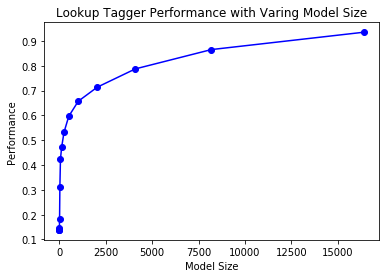

In [13]:
# 例5-4. 查找标注器的性能，使用不同大小的模型
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))
def display():
    import pylab
    word_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, word_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varing Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
display()


观察图 5-4，随着模型规模的增长，最初的性能增加迅速，最终达到一个稳定水平，这时模型的规模大量增加性能的提高很小。

#### 评估

在前面的例子中，你会注意到对准确性得分的强调。事实上，这些工具的性能评估是 NLP 的一个中心主题。回想图 1-5的处理流程；一个模块输出中的任何错误都在下游模块大大的放大。

我们对比专家分配的标记来评估一个标注器的性能。由于我们通常很难获得专业和公正的人的判断，所以使用黄金标准测试数据来代替。这是一个已经手动标注并作为自动系统评估标准而被接受的语料库。当标注器对给定词猜测的标记与黄金标准标记相同，标注器被视为是正确的

当然，设计和实施原始的黄金标准标注的也是人，更深入的分析可能会显示黄金标准中的错误，或者可能最终会导致一个修正的标记集和更复杂的指导方针。然而，黄金标准就目前有关的自动标注器的评估而言被定义成“正确的”。

> 开发一个已标注语料库是一个重大的任务。除了数据，它会产生复杂的工具、 文档和实践，为确保高品质的标注。标记集和其他编码方案不可避免地依赖于 一些理论主张，不是所有的理论主张都被共享。然而，语料库的创作者往往竭 尽全力使他们的工作尽可能理论中立，以最大限度地提高其工作的有效性。我 们将在第11章讨论创建一个语料库的挑战。



### 5.5 `N-gram`标注

#### 一元标注（`Unigram Tagging`）

**一元标注器基于一个简单的统计算法：对每个标识符分配这个独特的标识符最有可能的标记。** 例如：它将分配标记 `JJ` 给词 `frequent` 的所有出现，因为`frequent` 用作一个形容词（例 如：a` frequent word`）比用作一个动词（例如：`I frequent this cafe`）更常见。一个一元标注器的行为就像一个查找标注器（5.4节），除了有一个更方便的建立它的技术，称为训练。 在下面的代码例子中，我们训练一个一元标注器，用它来标注一个句子，然后评估：

In [14]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [15]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

我们训练一个 `UnigramTagger`，通过在我们初始化标注器时指定已标注的句子数据作为参数。训练过程中涉及检查每个词的标记，将所有词的最可能的标记存储在一个字典里面，这个字典存储在标注器内部。

#### 分离训练和测试数据

现在，我们正在一些数据上训练一个标注器，必须小心不要在相同的数据上测试，如我们在前面的例子中的那样。一个只是记忆它的训练数据，而不试图建立一个一般的模型的标注器会得到一个完美的得分，但在标注新的文本时将是无用的。

相反，我们应该分割数据，90％为测试数据，其余10％为测试数据：

In [16]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [17]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

虽然得分更糟糕了，但是我们现在对这种标注器是无用的（如：它在前所未见的文本上的性能）有了一个更好地了解。

#### 一般的`N-gram`的标注

在基于 `unigrams` 处理一个语言处理任务时，我们使用上下文中的一个项目。标注的时候，我们只考虑当前的标识符，与更大的上下文隔离。给定一个模型，我们能做的最好的是为每个词标注其先验的最可能的标记。这意味着我们将使用相同的标记标注一个词，如`wind`，不论它出现的上下文是 `the wind` 还是 `to wind`。 一个`n-gram`标注器是一个 `unigram` 标注器的一般化，它的上下文是当前词和它前面 `n-1`个标识符的词性标记，如图5-5所示。要选择的标记是圆圈里的`t_n`，灰色阴影的是上下文。 在图 5-5 所示的 `n-gram`标注器的例子中，我们让`n=3`，也就是说，我们考虑当前词的前两个词的标记。一个`n-gram`标注器挑选在给定的上下文中最有可能的标记。
![5-5](./imgs/5-5.jpg)

> 1`-gram`标注器是一元标注器（`unigram tagger`）另一个名称：即用于标注一个标识符的上下文的只是标识符本身。`2-gram` 标注器也称为二元标注器 （`bigram taggers`），`3-gram`标注器也称为三元标注器（`trigram taggers`）。


`NgramTagger` 类使用一个已标注的训练语料库来确定对每个上下文哪个词性标记最有可能。在这里，我们看到一个`n-gram`标注器的特殊情况，即一个 `bigram` 标注器。首先， 我们训练它，然后用它来标注未标注的句子：

In [18]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [19]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

请注意，`bigram` 标注器能够标注训练中它看到过的句子中的所有词，但对一个没见过的句子表现很差。只要遇到一个新词（如 13.5），就无法给它分配标记。它不能标注下面的词（如：`million`)，即使是在训练过程中看到过的，只是因为在训练过程中从来没有见过它前面有一个`None`标记的词。因此，标注器标注句子的其余部分也失败了。它的整体准确度得分非常低：

In [20]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

当`n`越大，上下文的特异性就会增加，我们要标注的数据中包含训练数据中不存在的上下文的几率也增大。这被称为数据稀疏问题，在NLP中是相当普遍的。因此，我们的研究结果的精度和覆盖范围之间需要有一个权衡（这与信息检索中的精度/召回权衡有关）。

> `N-gram` 标注器不应考虑跨越句子边界的上下文。因此，NLTK的标注器被设计用于句子链表，一个句子是一个词链表。在一个句子的开始，`t_n-1`和前面的标记被设置为 `None`。


#### 组合标注器

解决精度和覆盖范围之间的权衡的一个办法是尽可能的使用更精确的算法，但却在很多时候落后于具有更广覆盖范围的算法。例如：我们可以按如下方式组合 `bigram` 标注器、`unigram`标注器和一个默认标注器：
1. 尝试使用 `bigram` 标注器标注标识符。 
2. 如果 `bigram` 标注器无法找到一个标记，尝试 `unigram` 标注器。 
3. 如果 `unigram` 标注器也无法找到一个标记，使用默认标注器。

大多数NLTK标注器允许指定一个回退标注器。回退标注器自身可能也有一个回退标注器：

In [21]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [22]:
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t3.evaluate(test_sents)

0.843317053722715

请注意，我们在标注器初始化时指定回退标注器，从而使训练能利用回退标注器。 于是，如果在一个上下文中 `bigram` 标注器将分配与它的 `unigram` 回退标注器一样的标记，那么 `bigram` 标注器丢弃训练的实例。这样保持尽可能小的 `bigram` 标注器模型。我们可以进一步指定一个标注器需要看到一个上下文的多个实例才能保留它。例如：`nltk.BigramTagger(sents, cutoff=2, backoff=t1)`将会丢弃那些只看到一次或两次的上下文。


#### 标注生词

我们标注生词的方法仍然是回退到一个正则表达式标注器或一个默认标注器。这些都无法利用上下文。因此，如果我们的标注器遇到词 `blog`，训练过程中没有看到过，它会分配相同的标记，不论这个词出现的上下文是 `the blog` 还是 `to blog`。我们怎样才能更好地处理这些生词，或词汇表以外的项目？

一个有用的基于上下文标注生词的方法是限制一个标注器的词汇表为最频繁的n个词，使用 5.3节中的方法替代每个其他的词为一个特殊的词 `UNK`。训练时，一个 `unigram` 标注器可能会学到`UNK`通常是一个名词。然而，`n-gram`标注器会检测它的一些其他标记中的上下文。例如：如果前面的词是 `to`（标注为 `TO`），那么 `UNK` 可能会被标注为一个动词。


#### 存储标注器

在大语料库上训练一个标注器可能需要大量的时间。没有必要在每次我们需要的时候训练一个标注器，很容易将一个训练好的标注器保存到一个文件以后重复使用。让我们保存我们的标注器 `t2` 到文件 `t2.pkl`：

In [25]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

现在，我们可以在一个单独的Python 进程中载入我们保存的标注器：

In [26]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [27]:
# 现在，让我们的检查它是否可以用来标注：
text = """The board's action shows what free enterprise 
is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

#### 性能限制

一个 `n-gram` 标注器的性能上限是什么？考虑一个 `trigram` 标注器的情况。它遇到多少词性歧义的情况？我们可以根据经验决定这个问题的答案：

In [28]:
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1])
    for sent in brown_tagged_sents
    for x, y, z in nltk.trigrams(sent)
)

In [29]:
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

因此，`1/20`的 `trigrams` 是有歧义的。给定当前单词及其前两个标记，根据训练数据，在5％的情况中，有一个以上的标记可能合理地分配给当前词。假设我们总是挑选在这种含糊不清的上下文中最有可能的标记，可以得出 `trigram` 标注器性能的一个下界。

调查标注器性能的另一种方法是研究它的错误。有些标记可能会比别的更难分配，可能需要专门对这些数据进行预处理或后处理。一个方便的方式查看标注错误是**混淆矩阵**。它用图表表示期望的标记（黄金标准）与实际由标注器产生的标记：

In [30]:
test_tags = [tag for sent in brown.sents(categories='editorial')
    for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

基于这样的分析，我们可能会决定修改标记集。或许标记之间很难做出的区分可以被丢弃，因为它在一些较大的处理任务的上下文中并不重要。

分析标注器性能界限的另一种方式来自人类标注者之间并非100％的意见一致。 一般情况下，标注过程会消除区别：例如：当所有的人称代词被标注为`PRP` 时，词的特性通常会失去。与此同时，标注过程引入了新的区别从而去除了含糊之处：例如：`deal` 标注为`VB`或 `NN`。这种消除某些区别并引入新的区别的特点是标注的一个重要的特征，有利于分类和预测。当我们引入一个标记集的更细的划分时，在 `n-gram`标注器决定什么样的标记分配给一个特定的词时，可以获得关于左侧上下文的更详细的信息。然而，标注器同时 也将需要做更多的工作来划分当前的标识符，只是因为有更多可供选择的标记。相反，使用较少的区别（如简化的标记集），标注器有关上下文的信息会减少，为当前标识符分类的选择范围也较小。

#### 跨句子边界标注

一个 `n-gram`标注器使用最近的标记作为为当前的词选择标记的指导。当标记一个句子的第一个词时，`trigram` 标注器将使用前面两个标识符的词性标记，这通常会是前面句子的最后一个词和句子结尾的标点符号。然而，在前一句结尾的词的类别与下一句的开头的通常没有关系。

为了应对这种情况，我们可以使用已标注句子的链表来训练、运行和评估标注器，如例5-5所示。

In [31]:
# 例5-5. 句子层面的N-gram标注
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

### 5.6 基于转换的标注

`n-gram`标注器的一个潜在的问题是它们的 `n-gram`表的大小（或语言模型）。如果使用各种语言技术的标注器部署在移动计算设备上，在模型大小和标注器性能之间取得平衡是很重要的。使用回退标注器的`n-gram`标注器可能存储 `trigram` 和 `bigram` 表，这是很大的稀疏阵列，可能有数亿条条目。

第二个问题是关于上下文的。`n-gram`标注器从前面的上下文中获得的唯一的信息是标记，虽然词本身可能是一个有用的信息源。`n-gram`模型使用上下文中的词的其他特征为条件是不切实际的。在本节中，我们考察`Brill` 标注，一种归纳标注方法，它的性能很好，使用的模型只有 `n-gram`标注器的很小一部分。

`Brill` 标注是一种基于转换的学习，以它的发明者命名。一般的想法很简单：**猜每个词的标记，然后返回和修复错误的**。在这种方式中，`Brill` 标注器陆续将一个不良标注的文本转换成一个更好的。与 `n-gram`标注一样，这是有监督的学习方法，因为我们需要已标注的训练数据来评估标注器的猜测是否是一个错误。然而，不像 `n-gram`标注，它不计数观察结果，只编制一个转换修正规则链表。

`Brill` 标注的的过程通常是与绘画类比来解释的。假设我们要画一棵树，包括大树枝、树枝、小枝、叶子和一个统一的天蓝色背景的所有细节。不是先画树然后尝试在空白处画蓝色，而是简单的将整个画布画成蓝色，然后通过在蓝色背景上上色“修正”树的部分。以同样的方式，我们可能会画一个统一的褐色的树干再回过头来用更精细的刷子画进一步的细节。`Brill`标注使用了同样的想法：以大笔画开始，然后修复细节，一点点的细致的改变。 让我们看看下面的例子：
![list5-6](./imgs/list5-6.jpg)

在此表中，我们看到两个规则。所有这些规则由以下形式的模板产生：“替换`T1`为`T2`在上下文`C`中。”典型的上下文是之前或之后的词的内容或标记，或者当前词的两到三个词范围内出现的一个特定标记。在其训练阶段，`T1`，`T2`和 `C` 的标注器猜测值创造出数以千计的候选规则。每一条规则都根据其净收益打分：它修正的不正确标记的数目减去它错误修改的正确标记的数目。

`Brill` 标注器的另一个有趣的特性：**规则是语言学可解释的**。与采用潜在的巨大的`n-gram`表的 `n-gram`标注器相比，我们并不能从直接观察这样的一个表中学到多少东西，而`Brill` 标注器学到的规则可以。例 5-6 演示了NLTK 中的`Brill` 标注器。

In [33]:
nltk.tag.brill.nltkdemo18()

[Template(Pos([-1])),
 Template(Pos([1])),
 Template(Pos([-2])),
 Template(Pos([2])),
 Template(Pos([-2, -1])),
 Template(Pos([1, 2])),
 Template(Pos([-3, -2, -1])),
 Template(Pos([1, 2, 3])),
 Template(Pos([-1]),Pos([1])),
 Template(Word([-1])),
 Template(Word([1])),
 Template(Word([-2])),
 Template(Word([2])),
 Template(Word([-2, -1])),
 Template(Word([1, 2])),
 Template(Word([-3, -2, -1])),
 Template(Word([1, 2, 3])),
 Template(Word([-1]),Word([1]))]

### 5.7 如何确定一个词的分类

我们已经详细研究了词类，现在转向一个更基本的问题：如何决定一个词属于哪一类？ 首先应该考虑什么？在一般情况下，语言学家使用**形态学、句法和语义线索**确定一个词的类别。

#### 形态学线索

一个词的内部结构可能为这个词分类提供有用的线索。举例来说：`-ness`是一个后缀， 与形容词结合产生一个名词，如 `happy→happiness`，`ill→illness`。因此，如果我们遇到的一个以`-ness`结尾的词，很可能是一个名词。同样的，`-ment` 是与一些动词结合产生一个名词的后缀，如`govern→government` 和`establish→establishment`。 英语动词也可以是形态复杂的。例如：一个动词的现在分词以`-ing` 结尾，表示正在进行的还没有结束的行动（如：`falling`，`eating`）的意思。`-ing` 后缀也出现在从动词派生的名词中， 如：`the falling of the leaves`（这被称为动名词）

#### 句法线索

另一个信息来源是一个词可能出现的**典型的上下文语境**。例如：假设我们已经确定了名词类。那么我们可以说，英语形容词的句法标准是它可以立即出现在一个名词前，或紧跟在词`be`或 `very`后。根据这些测试，`near`应该被归类为形容词： `(2) a. the near window b. The end is (very) near.`

#### 语义线索

最后，一个词的意思对其词汇范畴是一个有用的线索。例如：名词的众所周知的一个定义是根据语义的：“一个人、地方或事物的名称。”在现代语言学，词类的语义标准受到怀疑，主要是因为它们很难规范化。然而，语义标准巩固了我们对许多词类的直觉，使我们能够在不熟悉的语言中很好的猜测词的分类。例如：如果我们都知道荷兰语词`verjaardag`的意思与 英语词 `birthday` 相同，那么我们可以猜测`verjaardag` 在荷兰语中是一个名词。然而，一些修补是必要的：虽然我们可能翻译 `zij is vandaag jarig` as `it’s her birthday today`，词 `jarig` 在荷兰语中实际上是形容词，与英语并不完全相同。

#### 新词

所有的语言都学习新的词汇。最近添加到牛津英语词典中的一个单词列表包括cybersla
cker、fatoush、blamestorm、SARS、cantopop、bupkis、noughties、muggle 和 robata。请注意，所有这些新词都是名词，这反映在名词被称为**开放类**。相反，介词被认为是一个封闭类。 也就是说，只有有限的词属于这个类别（例如：above、along、at、below、beside、between、 during、for、from、in、near、on、outside、over、past、through、towards、under、up、with），词类成员随着很长时间的推移才逐渐改变。


#### 词性标记集中的形态学

普通标记集经常捕捉一些**构词**信息，即词借助它们的句法角色获得的一种形态标记的信息。例如：思考下面句子中词go 的不同语法形式的选集：

(3) 
a. Go away! 

b. He sometimes goes to the cafe.

c. All the cakes have gone. 

d. We went on the excursion. 

这些形态中的每一个——go、goes、gone和 went——是形态学上的区别。思考形式 goes。它出现在受限制的语法环境中，需要一个第三人称单数的主语。

相比之下，gone 是过去分词形式；需要出现在have后面（在这个上下文中不能被goes替代），不能作为一个从句的主要动词出现。

`go/VB, goes/VBZ, gone/VBN, going/VBG,went/VBD`。

动词 `to be` 的各种形式也有特殊的标记：`be/BE，being/BEG，am/BEM，are/BER，is/BEZ，been/BEN，were/BED和was/BEDZ`

### 5.8 小结

- 词可以组成类，如名词、动词、形容词以及副词。这些类被称为词汇范畴或者词性。词性被分配短标签或者标记，如`NN`和`VB`。
- 给文本中的词自动分配词性的过程称为词性标注、POS标注或只是标注。
- 自动标注是NLP流程中重要的一步，在各种情况下都十分有用，包括预测先前未见过的词的行为、分析语料库中词的使用以及文本到语音转换系统。
- 一些语言学语料库，如布朗语料库，已经做了词性标注。
- 有多种标注方法，如默认标注器、正则表达式标注器、`unigram` 标注器、`n-gram`标注器。 这些都可以结合一种叫做**回退**的技术一起使用。
- 标注器可以使用已标注语料库进行训练和评估。
- 回退是一个组合模型的方法：当一个较专业的模型（如 `bigram` 标注器）不能为给定内容分配标记时，我们回退到一个较一般的模型（如 `unigram` 标注器）
- 词性标注是NLP中一个重要的早期的序列分类任务：利用局部上下文语境中的词和标记对序列中任意一点的分类决策
- `N-gram`标注器可以定义较大数值的 `n`，但是当`n`大于3 时，我们常常会面临数据稀疏问题；即使使用大量的训练数据，我们看到的也只是可能的上下文的一小部分。
- 基于转换的标注学习一系列“改变标记 `s` 为标记 `t` 在上下文 `c` 中”形式的修复规则，每个规则会修复错误，也可能引入（较小的）错误。